# Import Libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import tqdm
import warnings
import plotly.express as px
import math
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
%matplotlib inline
warnings.filterwarnings('ignore')

# Preprocessing (Step 1)

## Getting the Dataset

In [14]:
df = pd.read_excel(r'/content/drive/MyDrive/Total_Data_of_Refrigeration.xlsx')
df = pd.DataFrame(df)

## Take a Quick Look at the Data Structure

In [15]:
df.head()

,Troom,Tsuc,T0,Tdis,TC,Tamb,Tret,Tsup,Psuc,Pdis,Y
0,9.44,6.72,-0.01,58.84,33.51,23.20,10.34,7.7,2.92,8.51,0
1,9.44,6.74,0.07,58.82,33.51,23.20,10.34,7.7,2.93,8.51,0
2,9.46,6.76,0.07,58.80,33.38,23.21,10.34,7.7,2.93,8.48,0
3,9.46,6.76,0.07,58.80,33.51,23.21,10.34,7.7,2.93,8.51,0
4,9.47,6.76,-0.01,58.79,33.51,23.21,10.34,7.7,2.92,8.51,0


In [16]:
df.tail()

,Troom,Tsuc,T0,Tdis,TC,Tamb,Tret,Tsup,Psuc,Pdis,Y
72921,6.31,2.72,-11.84,74.98,35.40,26.61,6.90,3.91,1.86,8.97,1
72922,6.31,2.74,-11.57,75.01,35.40,26.60,6.90,3.91,1.88,8.97,1
72923,6.31,2.74,-11.57,75.01,35.40,26.60,6.90,3.91,1.88,8.97,1
72924,6.31,2.77,-11.57,75.01,35.44,26.58,6.90,3.91,1.87,8.97,1
72925,6.32,2.78,-11.70,75.03,35.40,26.59,6.94,3.94,1.87,8.97,1


In [17]:
df.shape

(72926, 11)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72926 entries, 0 to 72925
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Troom   72926 non-null  float64
 1   Tsuc    72926 non-null  float64
 2   T0      72926 non-null  float64
 3   Tdis    72926 non-null  float64
 4   TC      72926 non-null  float64
 5   Tamb    72926 non-null  float64
 6   Tret    72926 non-null  float64
 7   Tsup    72926 non-null  float64
 8   Psuc    72926 non-null  float64
 9   Pdis    72926 non-null  float64
 10  Y       72926 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 6.1 MB


In [19]:
df.describe()

,Troom,Tsuc,T0,Tdis,TC,Tamb,Tret,Tsup,Psuc,Pdis,Y
count,72926.000000,72926.000000,72926.000000,72926.000000,72926.000000,72926.000000,72926.000000,72926.000000,72926.00000,72926.000000,72926.000000
mean,5.013810,3.635417,-8.359053,70.382916,35.462179,25.650135,5.536322,2.621288,2.15747,8.992091,0.485026
std,3.196741,3.080449,4.309374,7.454556,1.477936,1.713184,3.410927,3.094781,0.36326,0.370720,0.499779
min,0.700000,-7.410000,-19.220000,57.890000,32.660000,22.870000,1.370000,-2.220000,1.37000,8.310000,0.000000
25%,2.010000,1.840000,-11.840000,64.000000,34.210000,24.400000,2.330000,-0.160000,1.86000,8.680000,0.000000
50%,5.740000,3.310000,-8.530000,70.340000,35.360000,25.310000,6.290000,2.620000,2.12000,8.960000,0.000000
75%,6.300000,6.130000,-4.430000,75.570000,36.390000,27.100000,6.870000,4.110000,2.48000,9.220000,1.000000
max,10.710000,10.330000,0.170000,92.540000,39.860000,29.890000,11.260000,8.450000,2.94000,10.130000,1.000000


In [20]:
df['Y'].value_counts(normalize=True)* 100

Y
0    51.497408
1    48.502592
Name: proportion, dtype: float64

<Axes: ylabel='Type'>

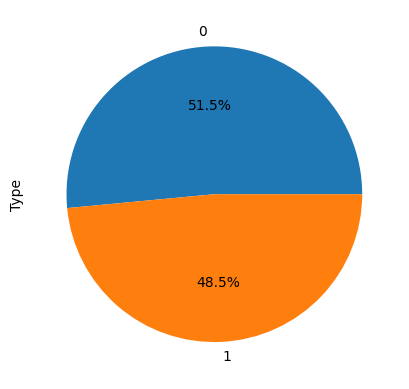

In [21]:
df.groupby('Y').size().plot(kind='pie',
                                       y = "Y",
                                       label = "Type",
                                       autopct='%1.1f%%')

## Missing Values

In [22]:
df.isnull().sum()

Troom    0
Tsuc     0
T0       0
Tdis     0
TC       0
Tamb     0
Tret     0
Tsup     0
Psuc     0
Pdis     0
Y        0
dtype: int64

## Discover and Visualize the Data to Gain Insights

In [23]:
df.columns

Index(['Troom', 'Tsuc', 'T0', 'Tdis', 'TC', 'Tamb', 'Tret', 'Tsup', 'Psuc',
       'Pdis', 'Y'],
      dtype='object')

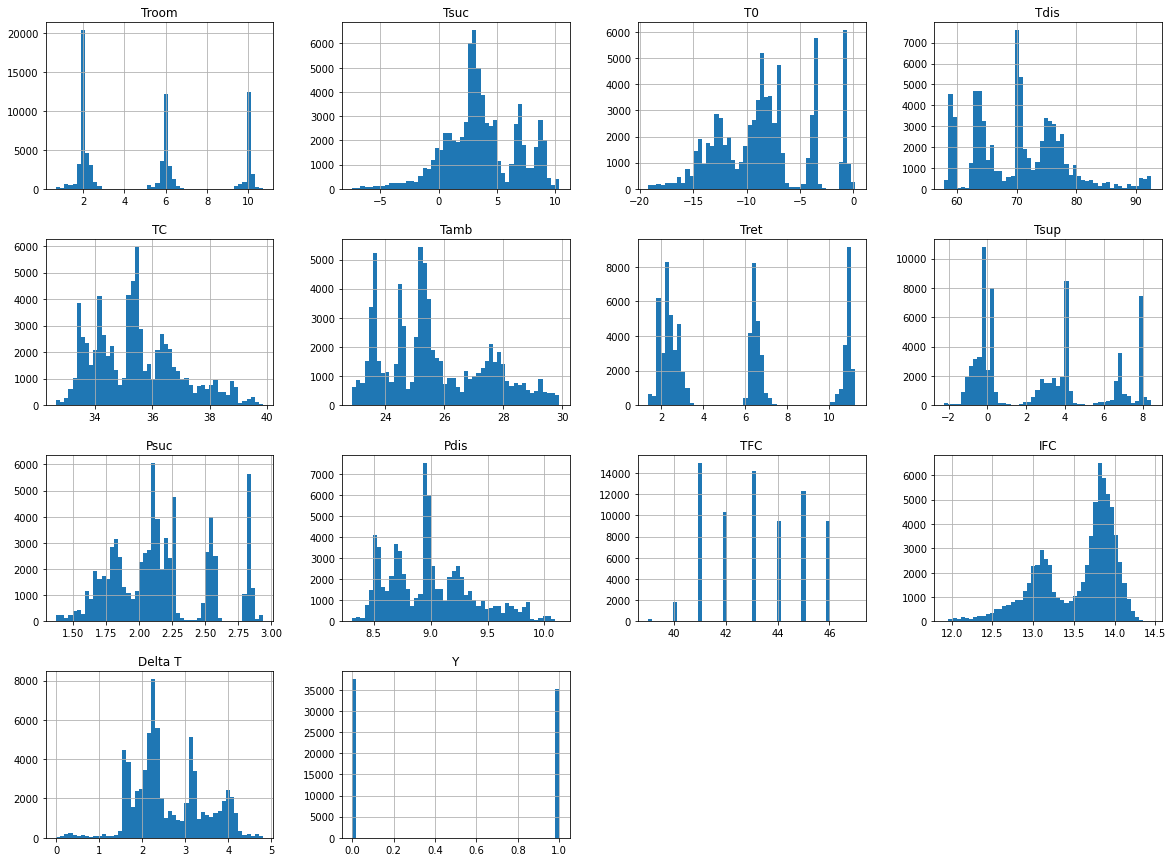

In [ ]:
dff = df.drop(['Time'], axis=1)
dff.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
fig = px.line(df, x=df["Time"][2662:13498], y=df["Troom"][2662:13498], title='Troom').update_layout(
    xaxis_title="Time(Min)", yaxis_title="°C"
)
fig.add_vrect(x0='2019-10-02 10:05:00', x1='2019-10-02 10:06:00',
              annotation_text=" (Time of fault happend) ", annotation_position="top right",
              fillcolor="red", opacity=0.45, line_width=0)
fig.add_vrect(x0='2019-10-02 10:05:00', x1='2019-10-02 10:35:00',
              fillcolor="green", opacity=0.25, line_width=0)
fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="red"
)
fig['layout']['xaxis_title']['font'] = dict(size=16)
fig['layout']['yaxis_title']['font'] = dict(size=16)
fig['layout']['title']['font'] = dict(size=18)
fig.show()

## Looking for Correlations

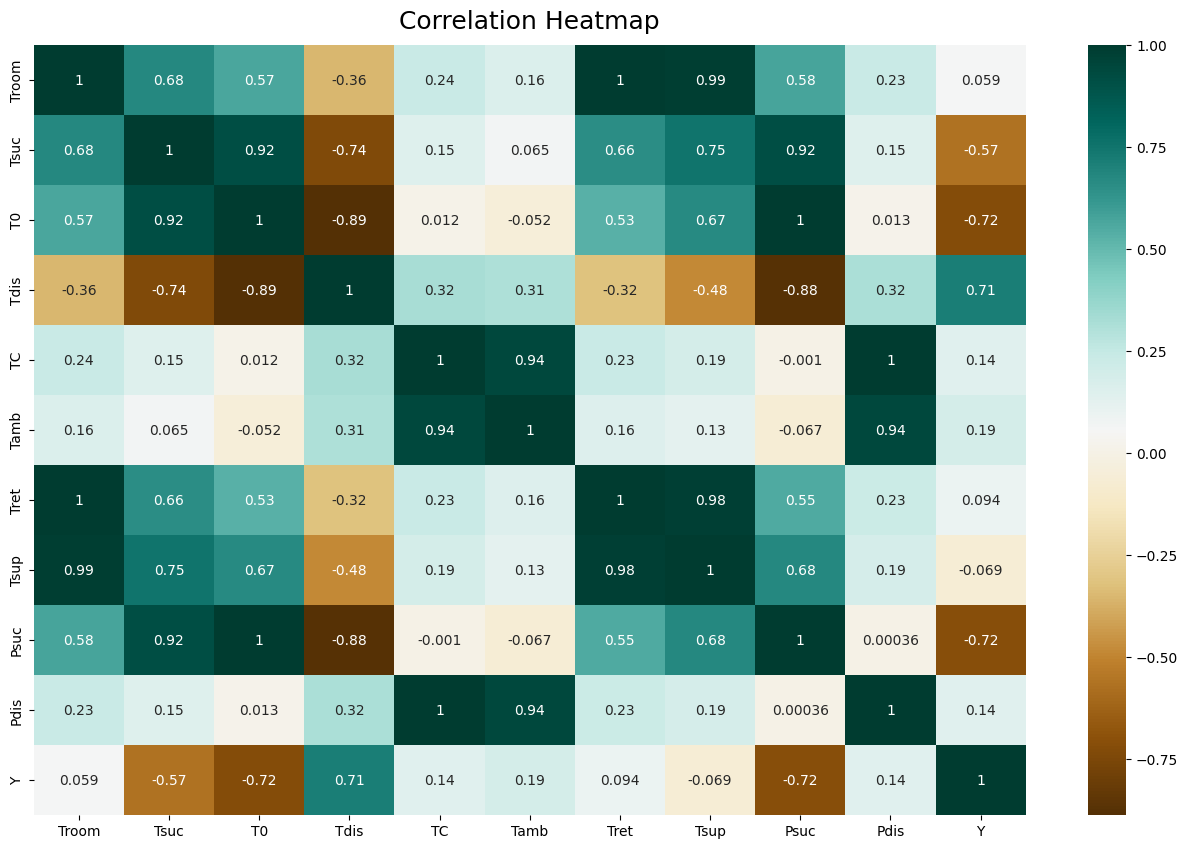

In [28]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(df.corr(),annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

# Random Forest

## Whole sensors

In [29]:
X = df.drop('Y', axis=1)
y = df[['Y']]
y = y.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(54694, 10)
(54694,)
(18232, 10)
(18232,)


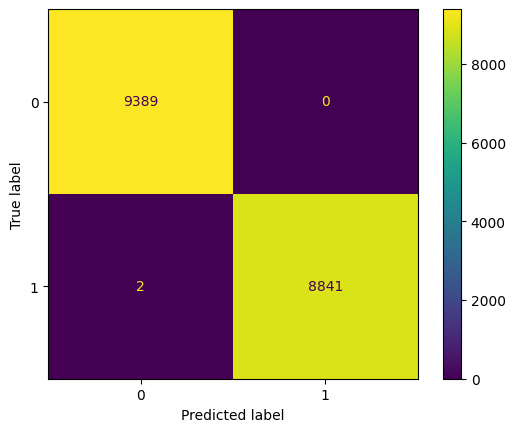

In [30]:
RF_Model = RandomForestClassifier()
RF_Model.fit(X_train, y_train)
y_pred = RF_Model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[9389    0]
 [   2 8841]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9389
           1       1.00      1.00      1.00      8843

    accuracy                           1.00     18232
   macro avg       1.00      1.00      1.00     18232
weighted avg       1.00      1.00      1.00     18232

0.9998903027643703


[0.06453389 0.11411841 0.21020214 0.22497859 0.01409788 0.04832689
 0.08577783 0.04364495 0.1778707  0.01644872]
1.0
|       |   RF_Model |
|:------|-----------:|
| Tdis  |  0.224979  |
| T0    |  0.210202  |
| Psuc  |  0.177871  |
| Tsuc  |  0.114118  |
| Tret  |  0.0857778 |
| Troom |  0.0645339 |
| Tamb  |  0.0483269 |
| Tsup  |  0.0436449 |
| Pdis  |  0.0164487 |
| TC    |  0.0140979 |


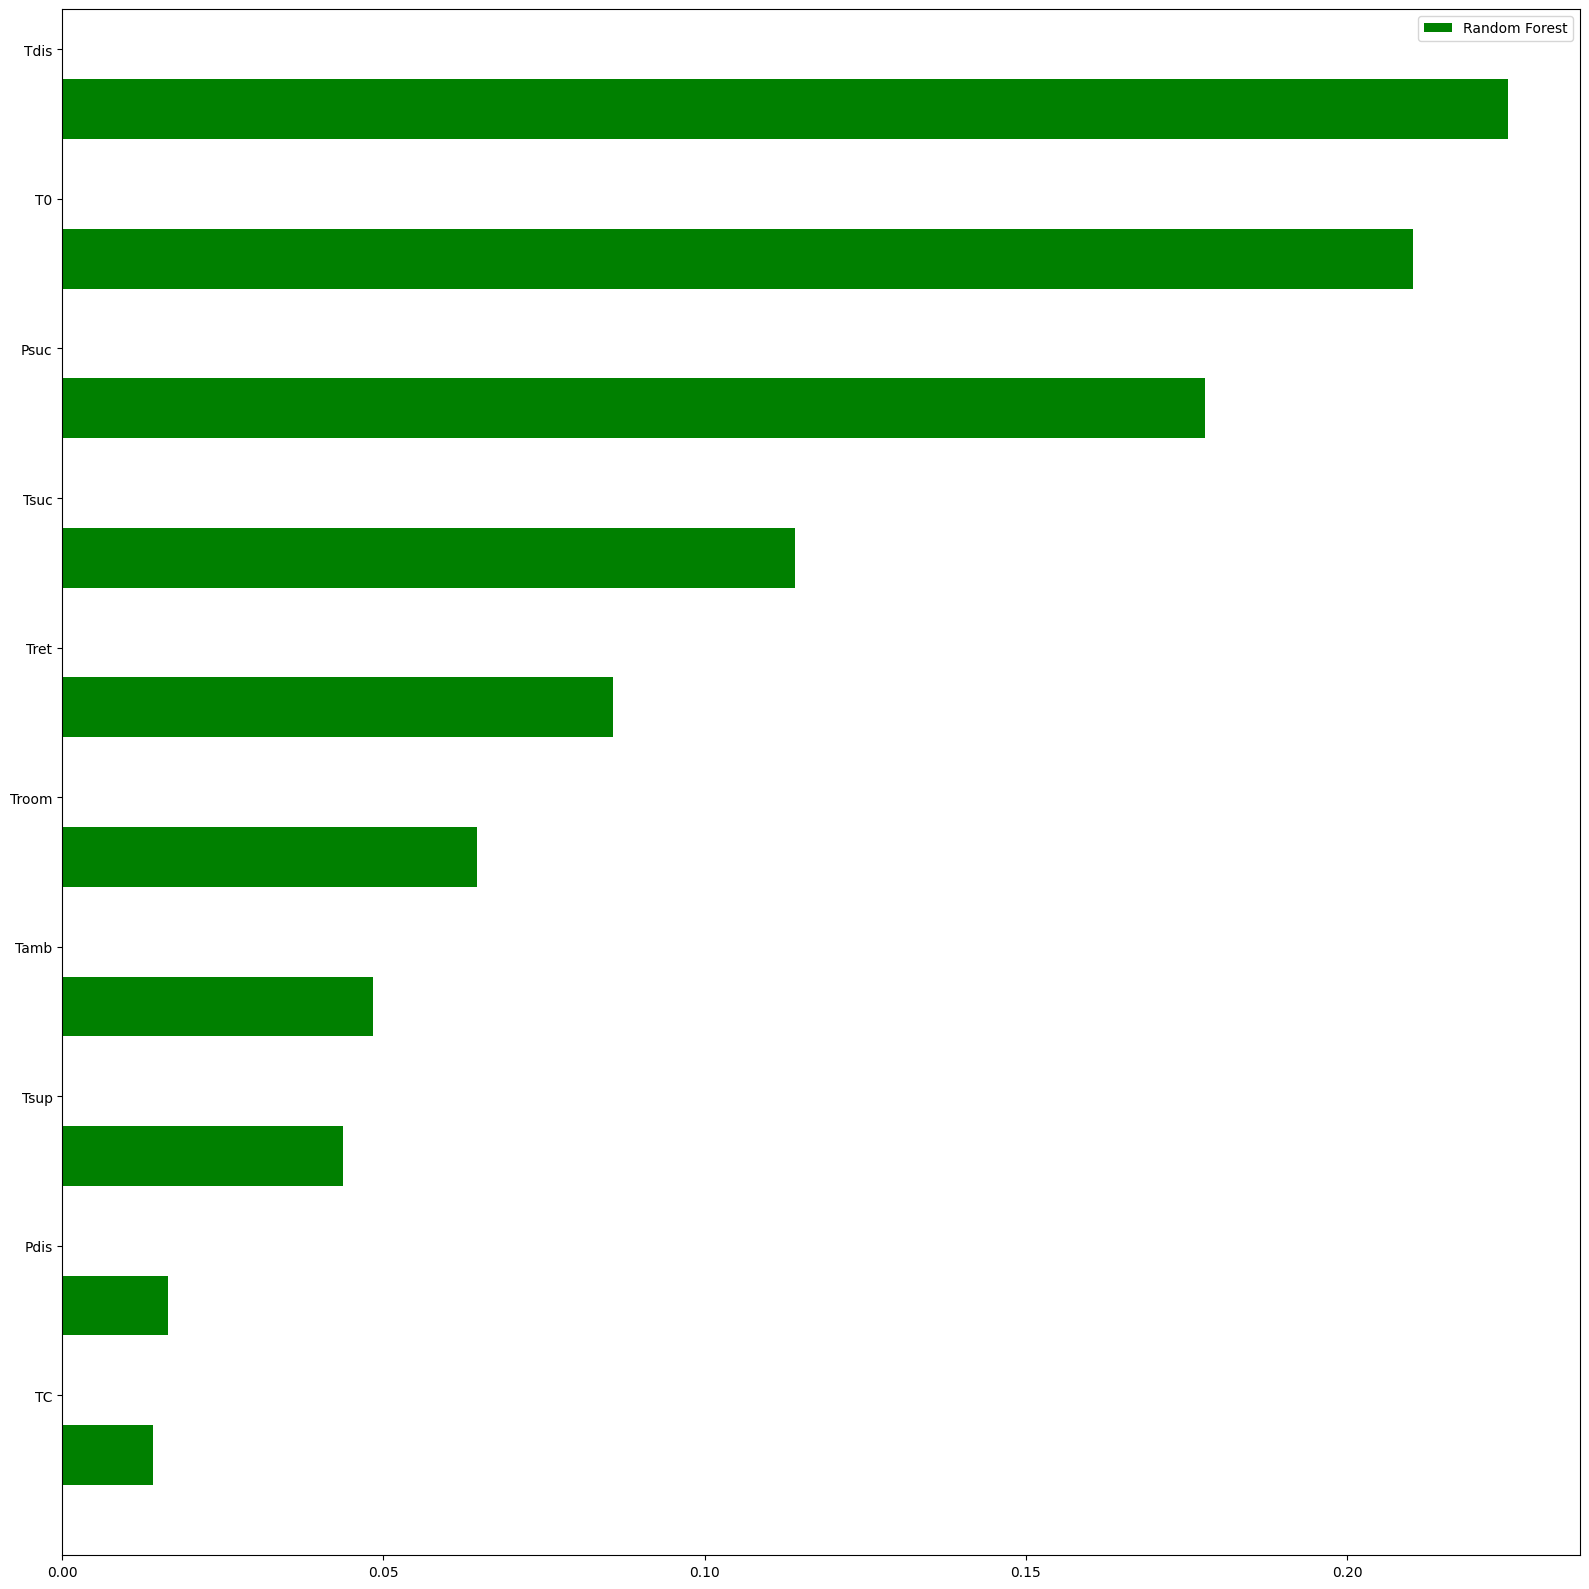

In [32]:
print(RF_Model.feature_importances_)
print(sum(RF_Model.feature_importances_))
feature_importance=pd.DataFrame({'RF_Model':RF_Model.feature_importances_},index=df.drop(columns=['Y']).columns)
feature_importance.sort_values(by='RF_Model',ascending=True,inplace=True)
feature_importance_sorted = feature_importance.sort_values( 'RF_Model',ascending=False)
print(feature_importance_sorted.to_markdown())
feature_importance_sorted.to_csv("Feature_Importance_Random_Forest.csv")
feature_importance=pd.DataFrame({'RF_Model':RF_Model.feature_importances_},index=df.drop(columns=['Y']).columns)
feature_importance.sort_values(by='RF_Model',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(16,16))
rfc_feature=ax.barh(index,feature_importance['RF_Model'],0.4,color='green',label='Random Forest')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.tight_layout()
plt.show()

## Adding 1 by 1 sensors

In [33]:
Ndf = df
Ndf.head()

,Troom,Tsuc,T0,Tdis,TC,Tamb,Tret,Tsup,Psuc,Pdis,Y
0,9.44,6.72,-0.01,58.84,33.51,23.20,10.34,7.7,2.92,8.51,0
1,9.44,6.74,0.07,58.82,33.51,23.20,10.34,7.7,2.93,8.51,0
2,9.46,6.76,0.07,58.80,33.38,23.21,10.34,7.7,2.93,8.48,0
3,9.46,6.76,0.07,58.80,33.51,23.21,10.34,7.7,2.93,8.51,0
4,9.47,6.76,-0.01,58.79,33.51,23.21,10.34,7.7,2.92,8.51,0


In [34]:
Ndf = Ndf.iloc[:,[3,2,8,1,6,0,5,7,9,4,10]]
Ndf.head()

,Tdis,T0,Psuc,Tsuc,Tret,Troom,Tamb,Tsup,Pdis,TC,Y
0,58.84,-0.01,2.92,6.72,10.34,9.44,23.20,7.7,8.51,33.51,0
1,58.82,0.07,2.93,6.74,10.34,9.44,23.20,7.7,8.51,33.51,0
2,58.80,0.07,2.93,6.76,10.34,9.46,23.21,7.7,8.48,33.38,0
3,58.80,0.07,2.93,6.76,10.34,9.46,23.21,7.7,8.51,33.51,0
4,58.79,-0.01,2.92,6.76,10.34,9.47,23.21,7.7,8.51,33.51,0


  0%|          | 0/10 [00:00<?, ?it/s]

0.90099824484423
0.9824484422992541
0.9825581395348837
0.9974221149627029
0.9997806055287407
0.9997257569109258
0.9999451513821852
0.9999451513821852
0.9999451513821852
0.9999451513821852
[0.90099824484423, 0.9824484422992541, 0.9825581395348837, 0.9974221149627029, 0.9997806055287407, 0.9997257569109258, 0.9999451513821852, 0.9999451513821852, 0.9999451513821852, 0.9999451513821852]


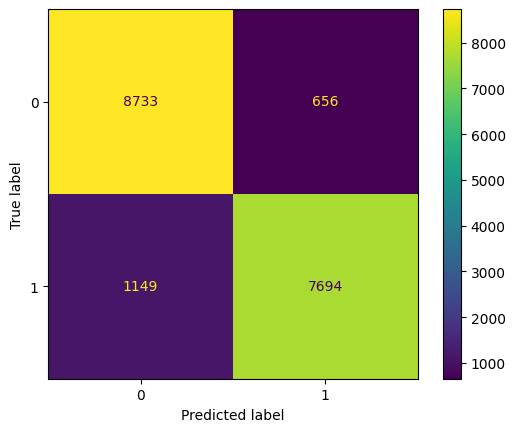

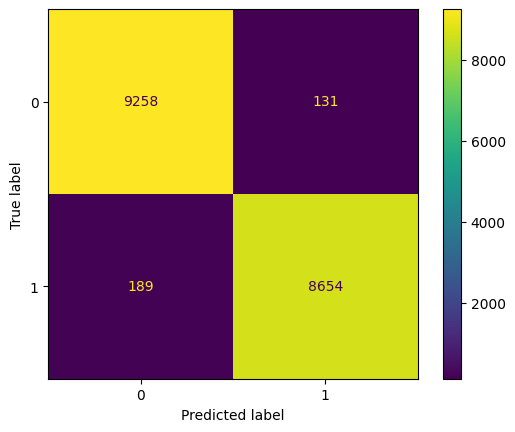

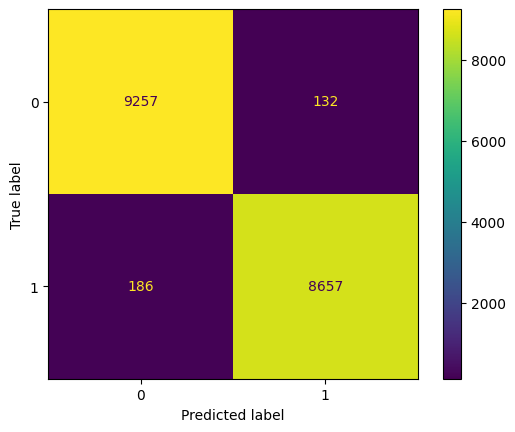

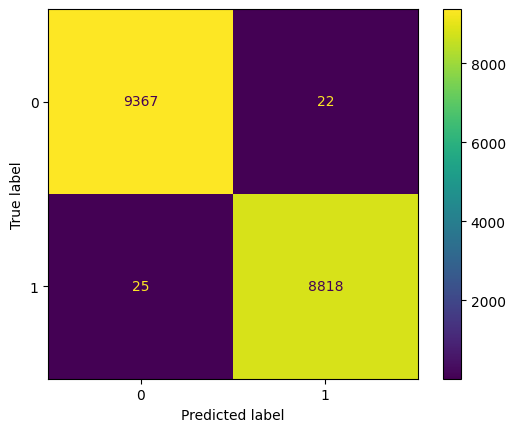

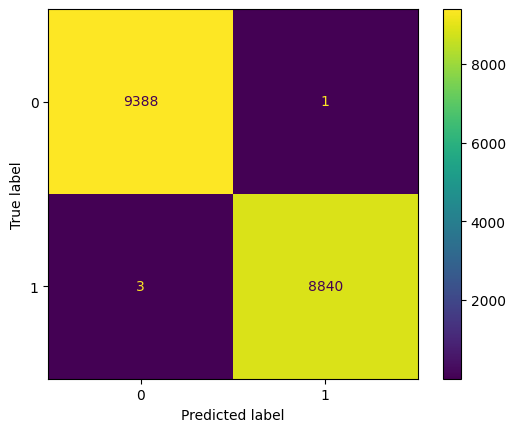

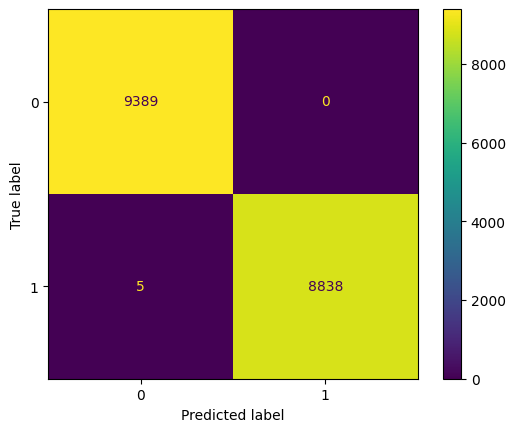

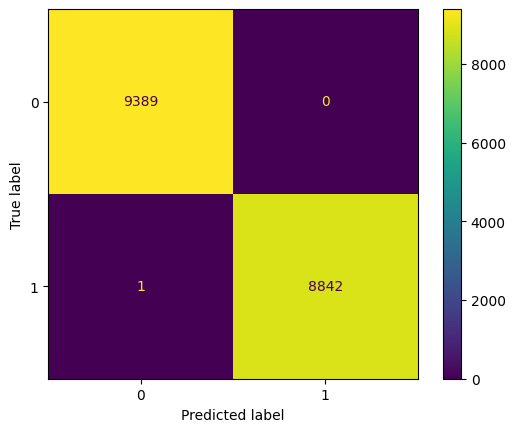

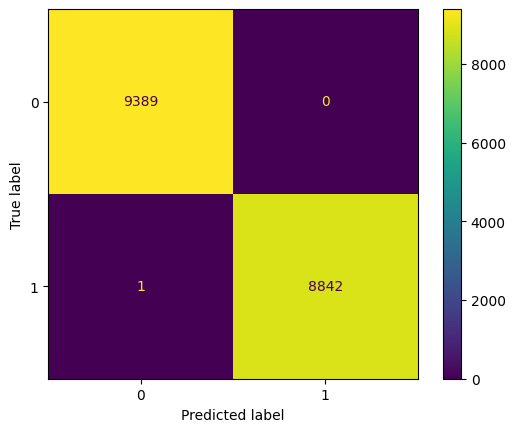

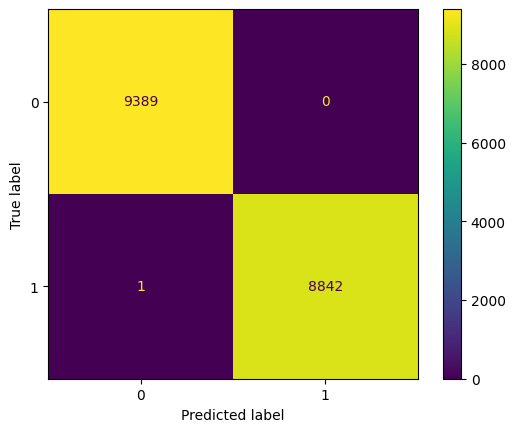

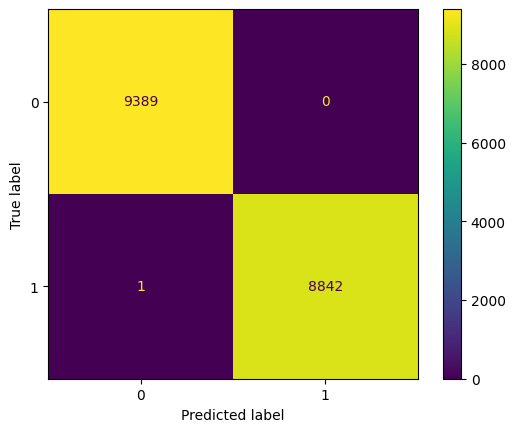

In [35]:
X = Ndf.iloc[:, 0:-1].values
y = Ndf.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 42)

X_train2 = pd.DataFrame(data=X_train)
X_test2 = pd.DataFrame(data=X_test)
y_train2 = pd.DataFrame(data=y_train)
y_test2 = pd.DataFrame(data=y_test)
RFlistt = []

for i in tqdm.tqdm_notebook(range(1,11,1)):

  X_test = X_test2.iloc[:, :i].values
  X_train = X_train2.iloc[:, :i].values
  y_train = y_train2.iloc[:, :].values
  y_test =  y_test2.iloc[:, :].values
  RF_Model = RandomForestClassifier()
  RF_Model.fit(X_train, y_train)
  y_pred = RF_Model.predict(X_test)
  cm = confusion_matrix(y_test,y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  scores = f1_score(y_test, y_pred, average='micro')
  RFlistt.append(mean(scores))
  print(scores)
print(RFlistt)

# XGBOOST

In [42]:
pip install xgboost

## Whole sensors

In [43]:
X = df.drop('Y', axis=1)
y = df[['Y']]
y = y.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(54694, 10)
(54694,)
(18232, 10)
(18232,)


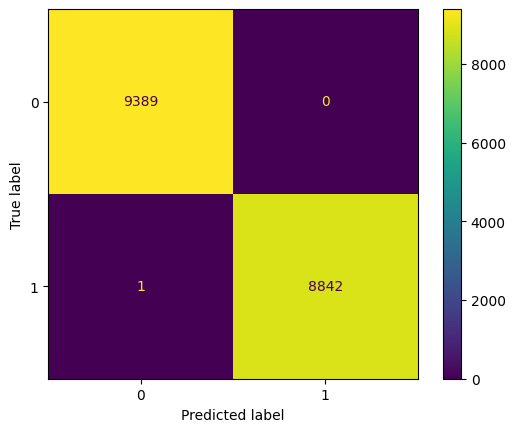

In [44]:
from xgboost import XGBClassifier
XGB_Model = XGBClassifier()
XGB_Model.fit(X_train, y_train)
y_pred = XGB_Model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[9389    0]
 [   1 8842]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9389
           1       1.00      1.00      1.00      8843

    accuracy                           1.00     18232
   macro avg       1.00      1.00      1.00     18232
weighted avg       1.00      1.00      1.00     18232

0.9999451513821852


[0.10752705 0.13469894 0.11329044 0.50774074 0.0160377  0.03995206
 0.03968013 0.00517052 0.03104562 0.00485681]
1.0000000037252903
|       |   XGB_Model |
|:------|------------:|
| Tdis  |  0.507741   |
| Tsuc  |  0.134699   |
| T0    |  0.11329    |
| Troom |  0.107527   |
| Tamb  |  0.0399521  |
| Tret  |  0.0396801  |
| Psuc  |  0.0310456  |
| TC    |  0.0160377  |
| Tsup  |  0.00517052 |
| Pdis  |  0.00485681 |


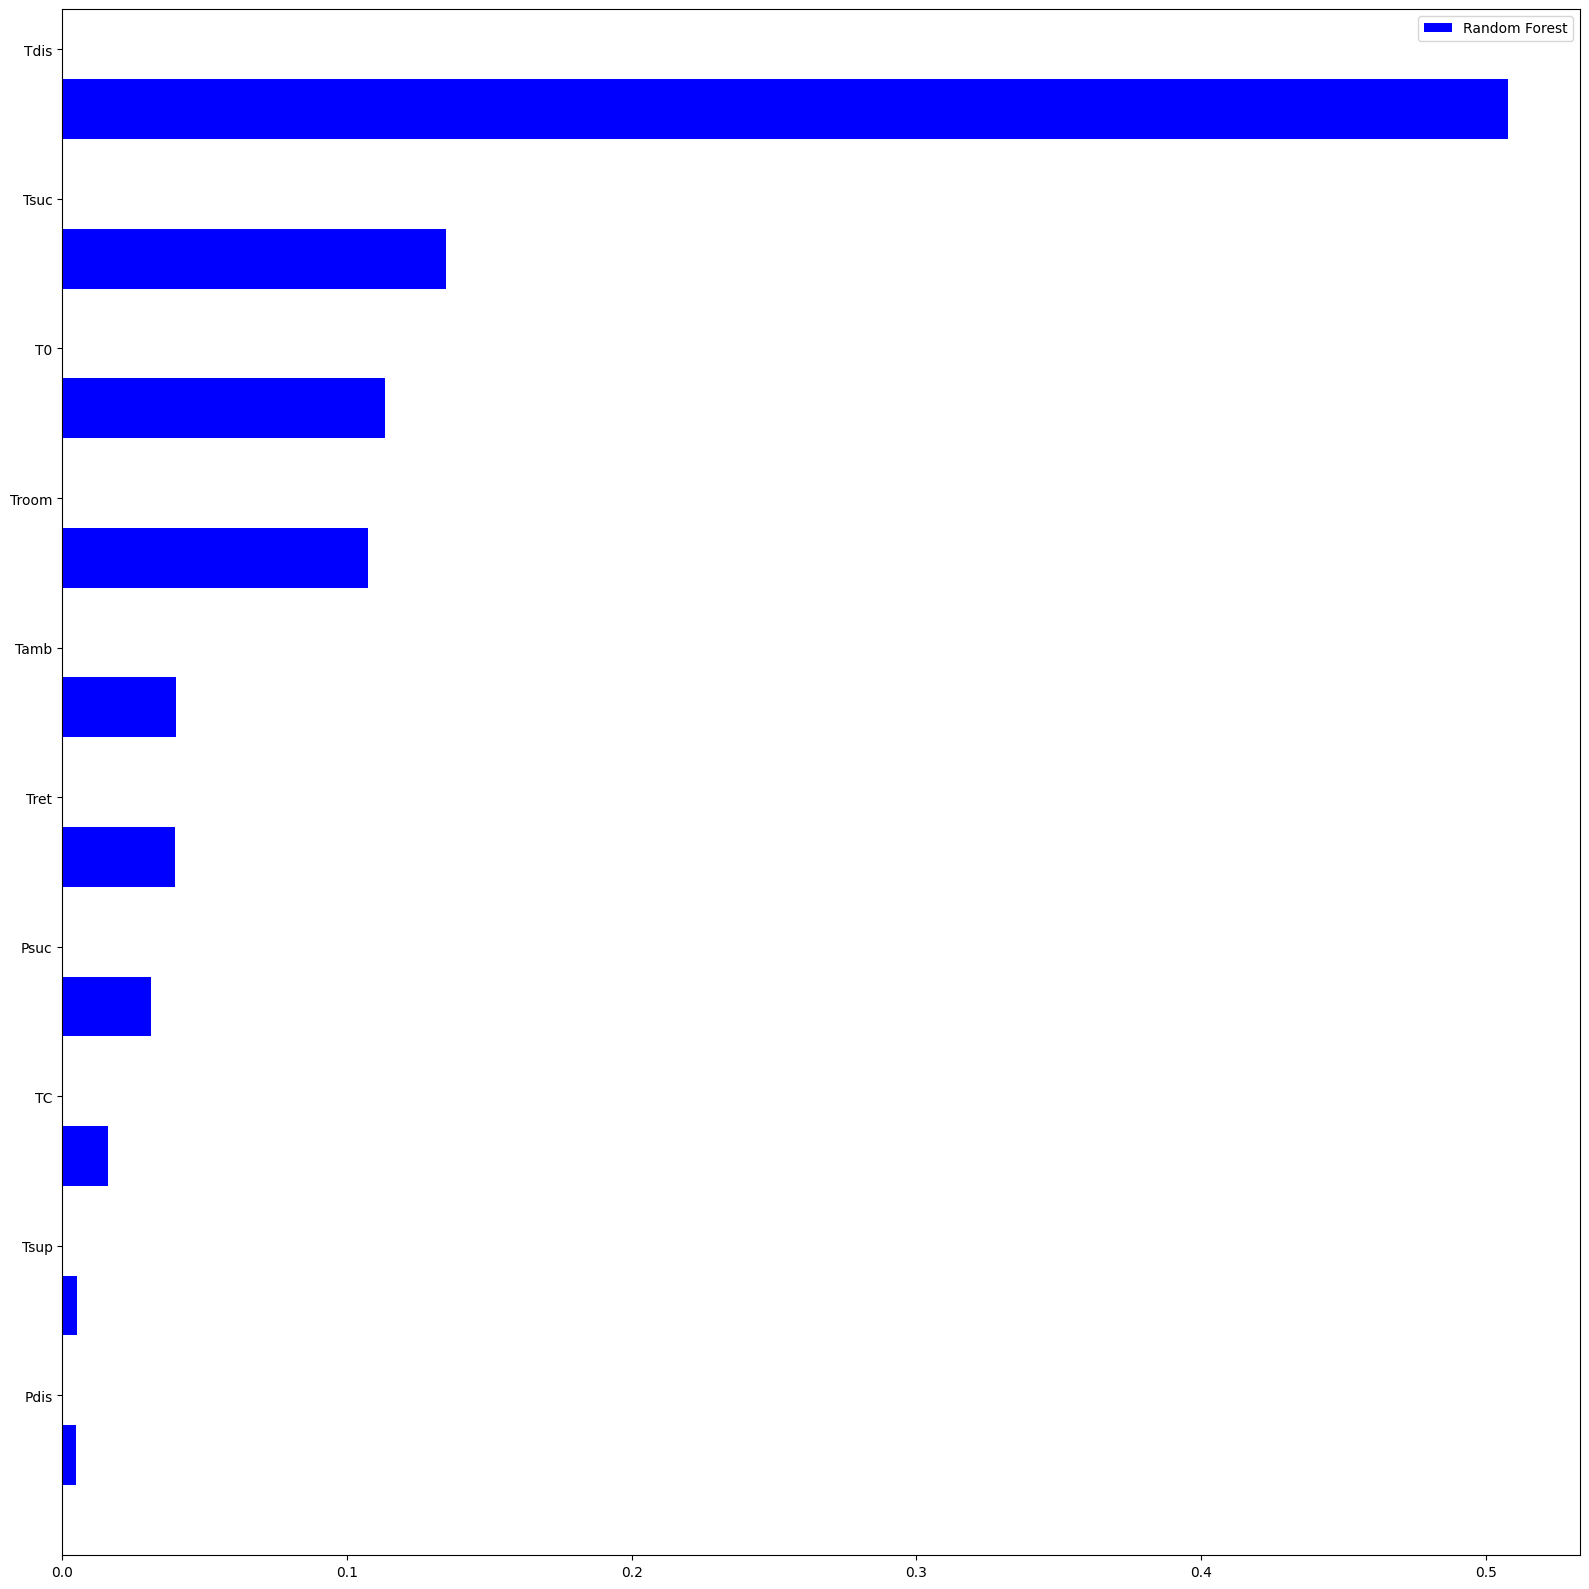

In [46]:
print(XGB_Model.feature_importances_)
print(sum(XGB_Model.feature_importances_))
feature_importance=pd.DataFrame({'XGB_Model':XGB_Model.feature_importances_},index=df.drop(columns=['Y']).columns)
feature_importance.sort_values(by='XGB_Model',ascending=True,inplace=True)
feature_importance_sorted = feature_importance.sort_values( 'XGB_Model',ascending=False)
print(feature_importance_sorted.to_markdown())
feature_importance_sorted.to_csv("Feature_Importance_XGBoost.csv")
feature_importance=pd.DataFrame({'XGB_Model':XGB_Model.feature_importances_},index=df.drop(columns=['Y']).columns)
feature_importance.sort_values(by='XGB_Model',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(16,16))
rfc_feature=ax.barh(index,feature_importance['XGB_Model'],0.4,color='blue',label='Random Forest')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.tight_layout()
plt.show()

## Adding 1 by 1 sensors

In [47]:
Ndf = df
Ndf.head()

,Troom,Tsuc,T0,Tdis,TC,Tamb,Tret,Tsup,Psuc,Pdis,Y
0,9.44,6.72,-0.01,58.84,33.51,23.20,10.34,7.7,2.92,8.51,0
1,9.44,6.74,0.07,58.82,33.51,23.20,10.34,7.7,2.93,8.51,0
2,9.46,6.76,0.07,58.80,33.38,23.21,10.34,7.7,2.93,8.48,0
3,9.46,6.76,0.07,58.80,33.51,23.21,10.34,7.7,2.93,8.51,0
4,9.47,6.76,-0.01,58.79,33.51,23.21,10.34,7.7,2.92,8.51,0


In [48]:
Ndf = Ndf.iloc[:,[3,1,2,0,5,6,8,4,7,9,10]]
Ndf.head()

,Tdis,Tsuc,T0,Troom,Tamb,Tret,Psuc,TC,Tsup,Pdis,Y
0,58.84,6.72,-0.01,9.44,23.20,10.34,2.92,33.51,7.7,8.51,0
1,58.82,6.74,0.07,9.44,23.20,10.34,2.93,33.51,7.7,8.51,0
2,58.80,6.76,0.07,9.46,23.21,10.34,2.93,33.38,7.7,8.48,0
3,58.80,6.76,0.07,9.46,23.21,10.34,2.93,33.51,7.7,8.51,0
4,58.79,6.76,-0.01,9.47,23.21,10.34,2.92,33.51,7.7,8.51,0


  0%|          | 0/10 [00:00<?, ?it/s]

0.8981461167178587
0.9822290478279947
0.996763931548925
0.9997806055287407
0.999670908293111
0.9999451513821852
0.9998354541465555
0.9999451513821852
0.9999451513821852
0.9999451513821852
[0.8981461167178587, 0.9822290478279947, 0.996763931548925, 0.9997806055287407, 0.999670908293111, 0.9999451513821852, 0.9998354541465555, 0.9999451513821852, 0.9999451513821852, 0.9999451513821852]


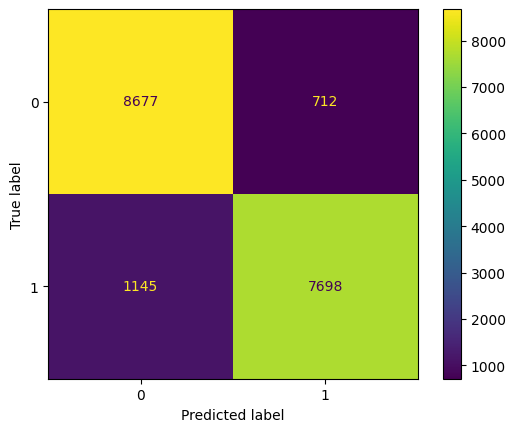

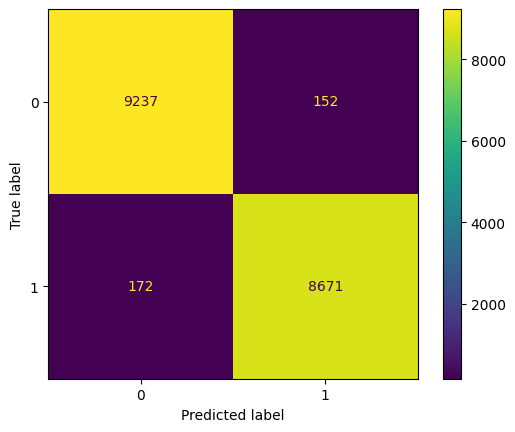

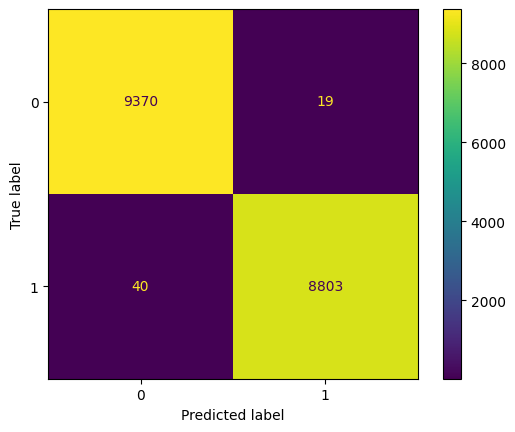

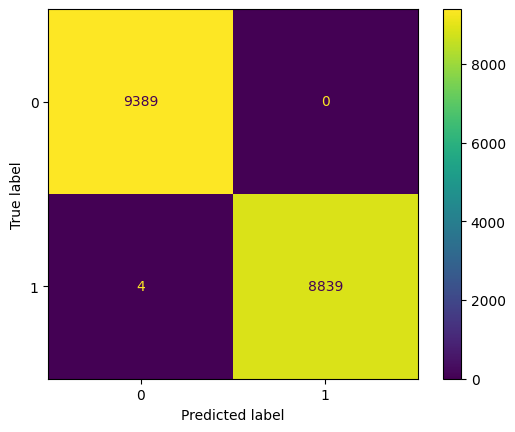

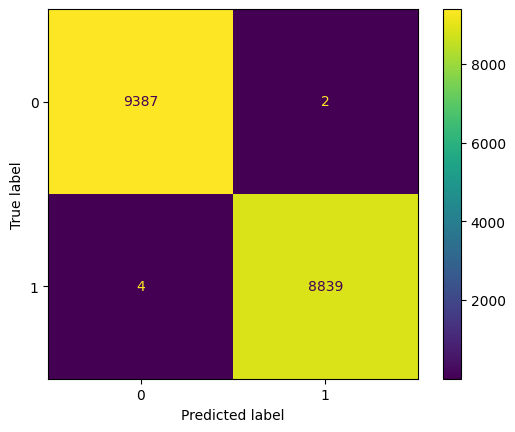

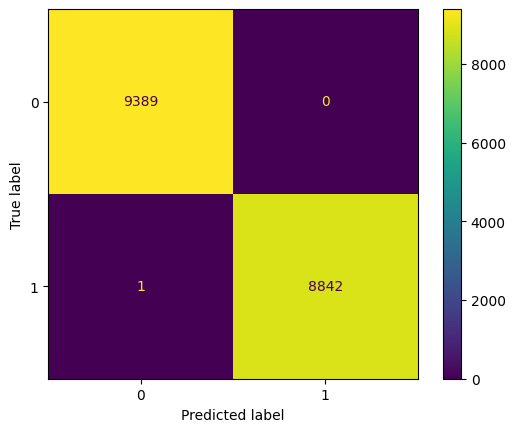

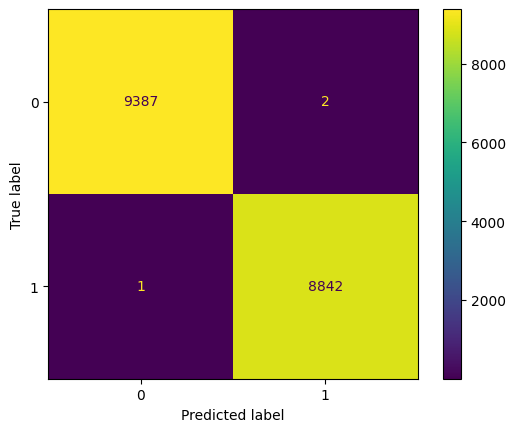

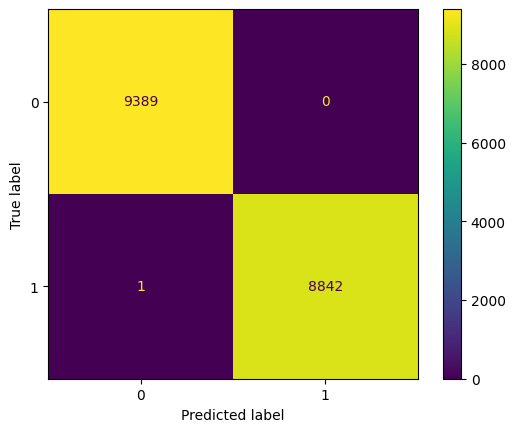

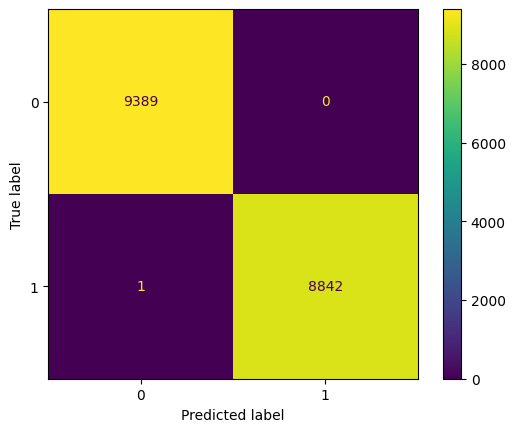

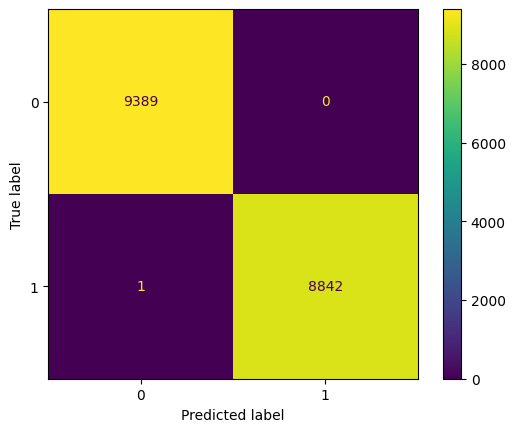

In [49]:
X = Ndf.iloc[:, 0:-1].values
y = Ndf.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 42)

X_train2 = pd.DataFrame(data=X_train)
X_test2 = pd.DataFrame(data=X_test)
y_train2 = pd.DataFrame(data=y_train)
y_test2 = pd.DataFrame(data=y_test)
XGBlistt = []

for i in tqdm.tqdm_notebook(range(1,11,1)):

  X_test = X_test2.iloc[:, :i].values
  X_train = X_train2.iloc[:, :i].values
  y_train = y_train2.iloc[:, :].values
  y_test =  y_test2.iloc[:, :].values
  XGB_Model = XGBClassifier()
  XGB_Model.fit(X_train, y_train)
  y_pred = XGB_Model.predict(X_test)
  cm = confusion_matrix(y_test,y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  scores = f1_score(y_test, y_pred, average='micro')
  XGBlistt.append(mean(scores))
  print(scores)
print(XGBlistt)

# CATBoost

In [56]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.0 MB/s eta 0:00:00


## Whole sensors

In [57]:
X = df.drop('Y', axis=1)
y = df[['Y']]
y = y.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(54694, 10)
(54694,)
(18232, 10)
(18232,)


Learning rate set to 0.05689
0:	learn: 0.5515449	total: 65.2ms	remaining: 1m 5s
1:	learn: 0.4525909	total: 80.4ms	remaining: 40.1s
2:	learn: 0.3602550	total: 95.6ms	remaining: 31.8s
3:	learn: 0.2878996	total: 112ms	remaining: 27.8s
4:	learn: 0.2298654	total: 127ms	remaining: 25.2s
5:	learn: 0.1841808	total: 142ms	remaining: 23.5s
6:	learn: 0.1547223	total: 157ms	remaining: 22.3s
7:	learn: 0.1326301	total: 172ms	remaining: 21.3s
8:	learn: 0.1092697	total: 188ms	remaining: 20.7s
9:	learn: 0.0931297	total: 206ms	remaining: 20.4s
10:	learn: 0.0805745	total: 221ms	remaining: 19.9s
11:	learn: 0.0705754	total: 236ms	remaining: 19.4s
12:	learn: 0.0615377	total: 264ms	remaining: 20s
13:	learn: 0.0541417	total: 293ms	remaining: 20.6s
14:	learn: 0.0479776	total: 309ms	remaining: 20.3s
15:	learn: 0.0431218	total: 324ms	remaining: 19.9s
16:	learn: 0.0400303	total: 339ms	remaining: 19.6s
17:	learn: 0.0358279	total: 353ms	remaining: 19.3s
18:	learn: 0.0333362	total: 368ms	remaining: 19s
19:	learn: 0.

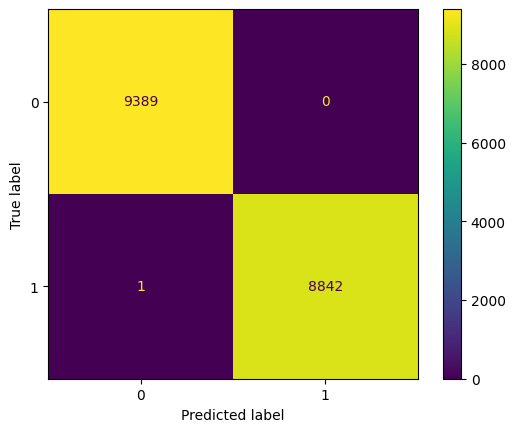

In [58]:
from catboost import CatBoostClassifier
CAT_Model = CatBoostClassifier()
CAT_Model.fit(X_train, y_train)
y_pred = CAT_Model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[9389    0]
 [   1 8842]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9389
           1       1.00      1.00      1.00      8843

    accuracy                           1.00     18232
   macro avg       1.00      1.00      1.00     18232
weighted avg       1.00      1.00      1.00     18232

0.9999451513821852


[ 9.13929595 10.40637635 12.61487182 10.56373105  5.98988291 11.05497897
 20.34756636  6.44168105 10.41422034  3.0273952 ]
100.0
|       |   CAT_Model |
|:------|------------:|
| Tret  |    20.3476  |
| T0    |    12.6149  |
| Tamb  |    11.055   |
| Tdis  |    10.5637  |
| Psuc  |    10.4142  |
| Tsuc  |    10.4064  |
| Troom |     9.1393  |
| Tsup  |     6.44168 |
| TC    |     5.98988 |
| Pdis  |     3.0274  |


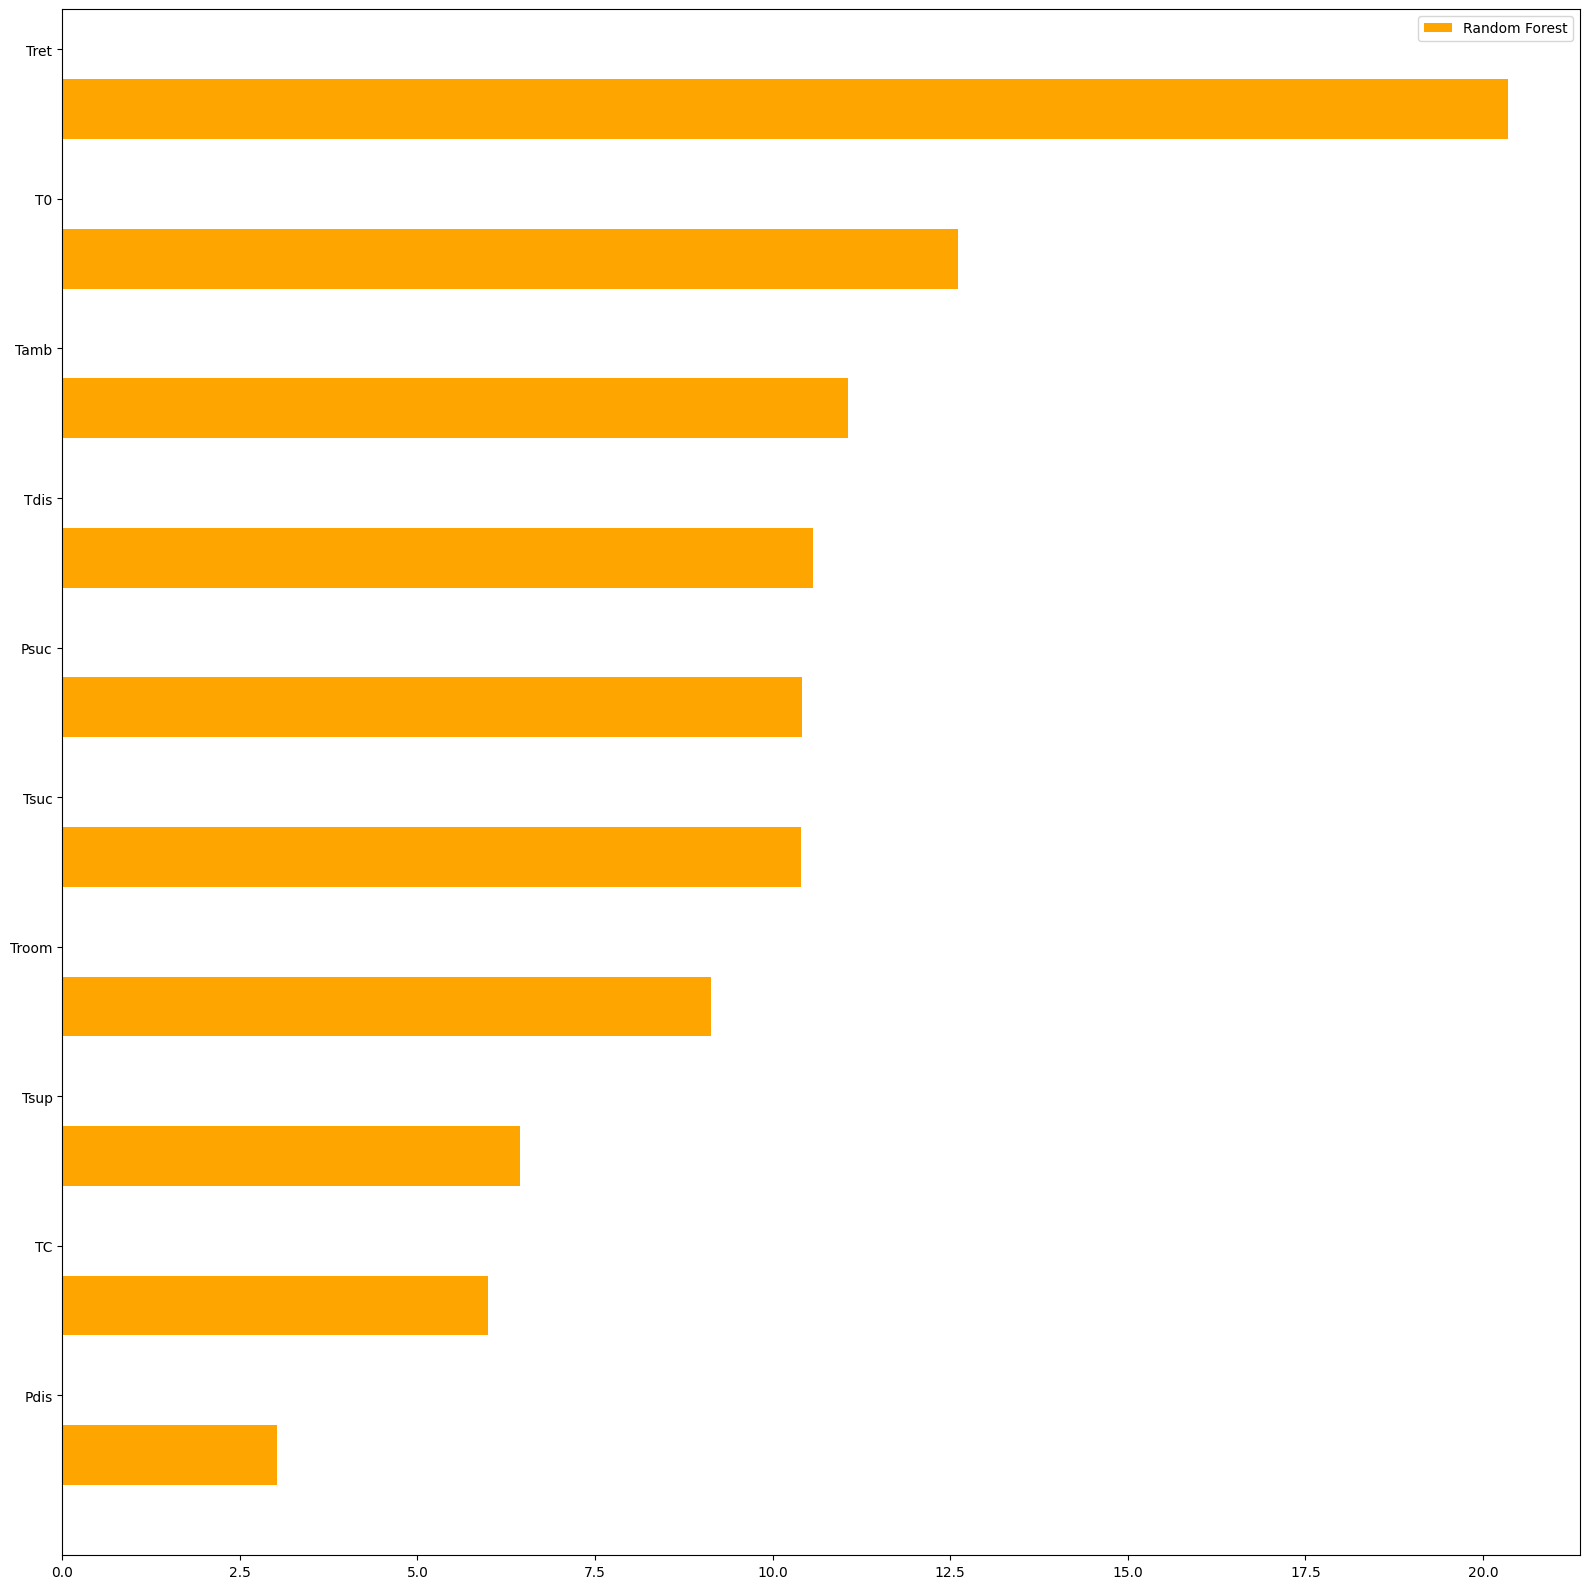

In [60]:
print(CAT_Model.feature_importances_)
print(sum(CAT_Model.feature_importances_))
feature_importance=pd.DataFrame({'CAT_Model':CAT_Model.feature_importances_},index=df.drop(columns=['Y']).columns)
feature_importance.sort_values(by='CAT_Model',ascending=True,inplace=True)
feature_importance_sorted = feature_importance.sort_values('CAT_Model',ascending=False)
print(feature_importance_sorted.to_markdown())
feature_importance_sorted.to_csv("Feature_Importance_CAT_Model.csv")
feature_importance=pd.DataFrame({'CAT_Model':CAT_Model.feature_importances_},index=df.drop(columns=['Y']).columns)
feature_importance.sort_values(by='CAT_Model',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(16,16))
rfc_feature=ax.barh(index,feature_importance['CAT_Model'],0.4,color='orange',label='Random Forest')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.tight_layout()
plt.show()

## Adding 1 by 1 sensors

In [63]:
Ndf = df
Ndf.head()

,Troom,Tsuc,T0,Tdis,TC,Tamb,Tret,Tsup,Psuc,Pdis,Y
0,9.44,6.72,-0.01,58.84,33.51,23.20,10.34,7.7,2.92,8.51,0
1,9.44,6.74,0.07,58.82,33.51,23.20,10.34,7.7,2.93,8.51,0
2,9.46,6.76,0.07,58.80,33.38,23.21,10.34,7.7,2.93,8.48,0
3,9.46,6.76,0.07,58.80,33.51,23.21,10.34,7.7,2.93,8.51,0
4,9.47,6.76,-0.01,58.79,33.51,23.21,10.34,7.7,2.92,8.51,0


In [64]:
Ndf = Ndf.iloc[:,[6,2,5,3,8,1,0,7,4,9,10]]
Ndf.head()

,Tret,T0,Tamb,Tdis,Psuc,Tsuc,Troom,Tsup,TC,Pdis,Y
0,10.34,-0.01,23.20,58.84,2.92,6.72,9.44,7.7,33.51,8.51,0
1,10.34,0.07,23.20,58.82,2.93,6.74,9.44,7.7,33.51,8.51,0
2,10.34,0.07,23.21,58.80,2.93,6.76,9.46,7.7,33.38,8.48,0
3,10.34,0.07,23.21,58.80,2.93,6.76,9.46,7.7,33.51,8.51,0
4,10.34,-0.01,23.21,58.79,2.92,6.76,9.47,7.7,33.51,8.51,0


  0%|          | 0/10 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
10:	learn: 0.0843740	total: 166ms	remaining: 14.9s
11:	learn: 0.0723755	total: 180ms	remaining: 14.8s
12:	learn: 0.0643003	total: 193ms	remaining: 14.7s
13:	learn: 0.0568961	total: 207ms	remaining: 14.6s
14:	learn: 0.0515261	total: 220ms	remaining: 14.5s
15:	learn: 0.0456082	total: 234ms	remaining: 14.4s
16:	learn: 0.0421649	total: 251ms	remaining: 14.5s
17:	learn: 0.0387145	total: 264ms	remaining: 14.4s
18:	learn: 0.0358867	total: 278ms	remaining: 14.4s
19:	learn: 0.0338206	total: 293ms	remaining: 14.4s
20:	learn: 0.0321652	total: 306ms	remaining: 14.3s
21:	learn: 0.0307254	total: 320ms	remaining: 14.2s
22:	learn: 0.0292885	total: 333ms	remaining: 14.2s
23:	learn: 0.0277478	total: 354ms	remaining: 14.4s
24:	learn: 0.0261438	total: 367ms	remaining: 14.3s
25:	learn: 0.0247045	total: 380ms	remaining: 14.3s
26:	learn: 0.0237537	total: 394ms	remaining: 14.2s
27:	learn: 0.0225605	total: 407ms	remaining: 14.1s
28:	learn: 0.0211794	total: 421

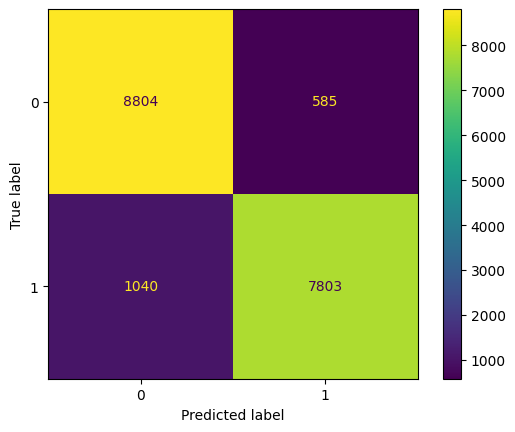

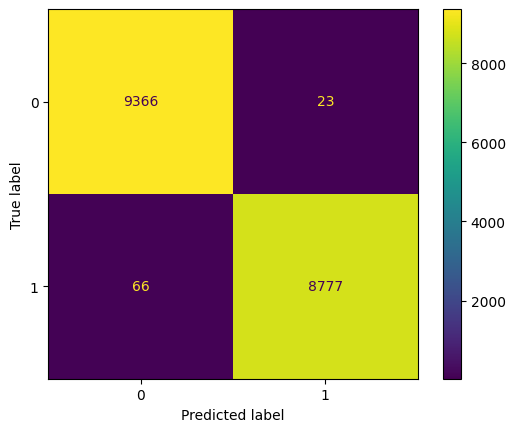

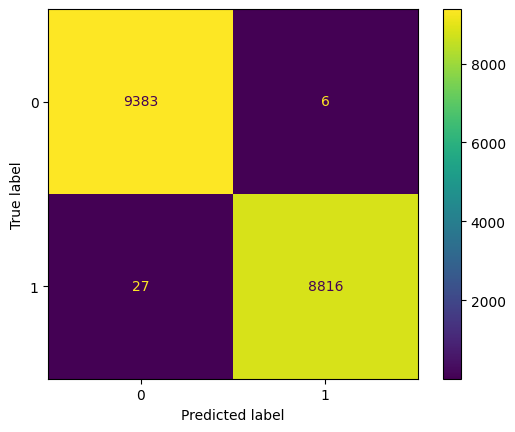

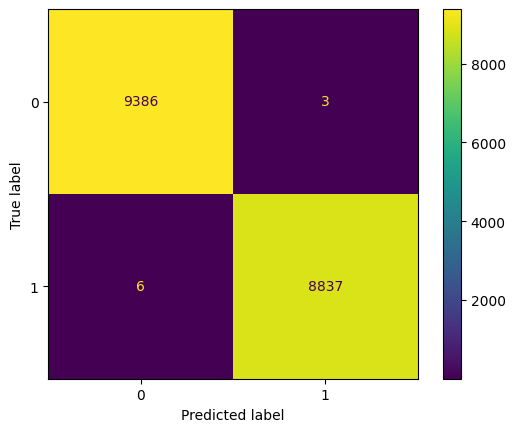

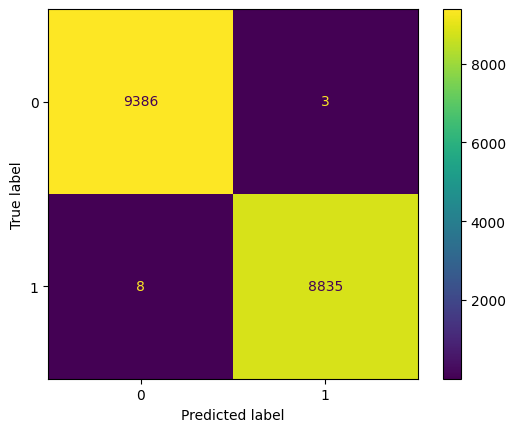

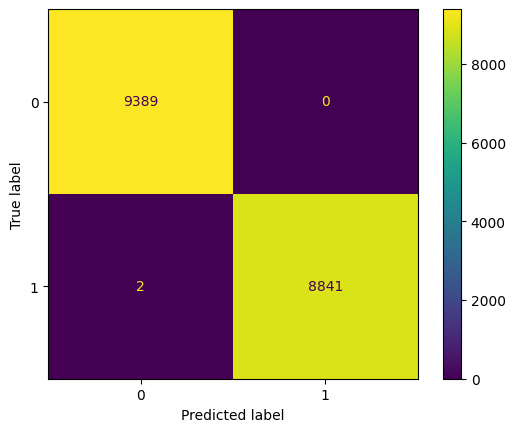

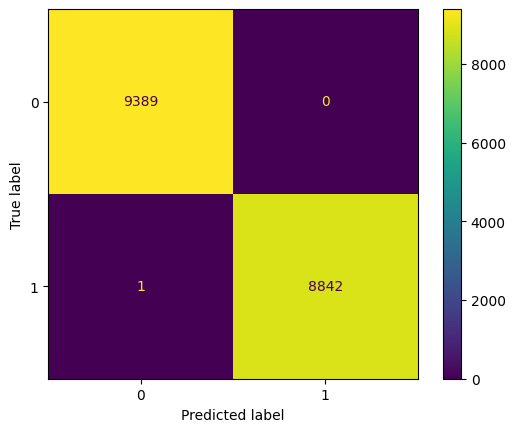

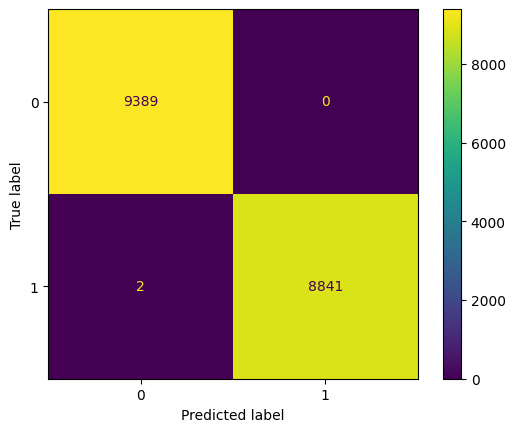

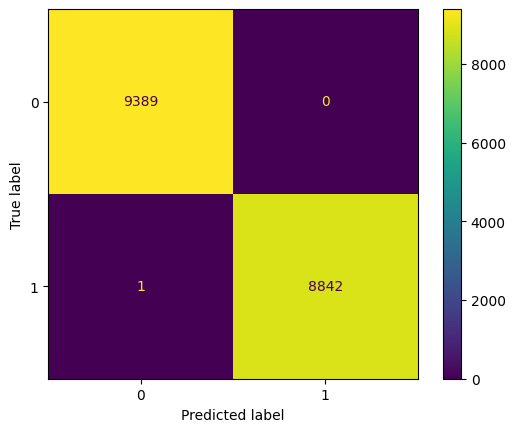

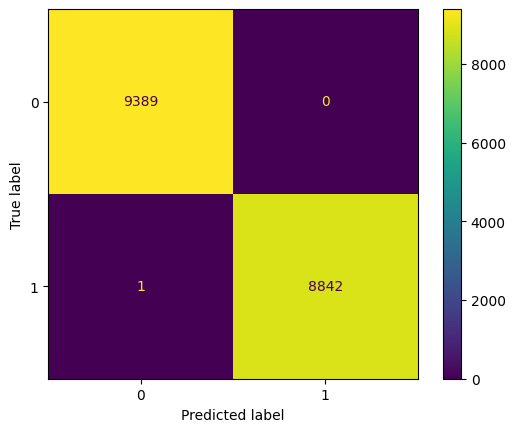

In [65]:
X = Ndf.iloc[:, 0:-1].values
y = Ndf.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 42)

X_train2 = pd.DataFrame(data=X_train)
X_test2 = pd.DataFrame(data=X_test)
y_train2 = pd.DataFrame(data=y_train)
y_test2 = pd.DataFrame(data=y_test)
CATlistt = []

for i in tqdm.tqdm_notebook(range(1,11,1)):

  X_test = X_test2.iloc[:, :i].values
  X_train = X_train2.iloc[:, :i].values
  y_train = y_train2.iloc[:, :].values
  y_test =  y_test2.iloc[:, :].values
  CAT_Model = CatBoostClassifier()
  CAT_Model.fit(X_train, y_train)
  y_pred = CAT_Model.predict(X_test)
  cm = confusion_matrix(y_test,y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  scores = f1_score(y_test, y_pred, average='micro')
  CATlistt.append(mean(scores))
  print(scores)
print(CATlistt)

# LightGBM

In [69]:
pip install lightgbm

In [70]:
X = df.drop('Y', axis=1)
y = df[['Y']]
y = y.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(54694, 10)
(54694,)
(18232, 10)
(18232,)


## Whole sensors

[LightGBM] [Info] Number of positive: 26528, number of negative: 28166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2162
[LightGBM] [Info] Number of data points in the train set: 54694, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485026 -> initscore=-0.059915
[LightGBM] [Info] Start training from score -0.059915


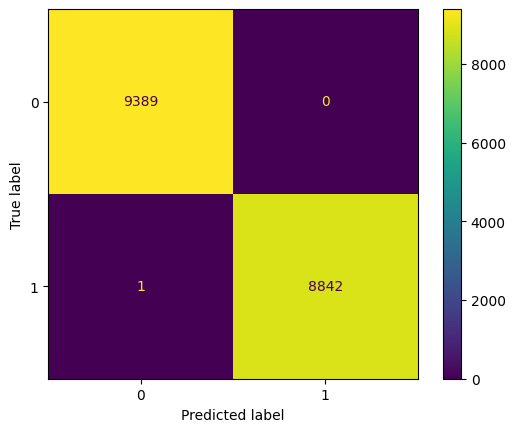

In [71]:
import lightgbm as lgb
LGBM_Model = lgb.LGBMClassifier()
LGBM_Model.fit(X_train, y_train)
y_pred = LGBM_Model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[9389    0]
 [   1 8842]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9389
           1       1.00      1.00      1.00      8843

    accuracy                           1.00     18232
   macro avg       1.00      1.00      1.00     18232
weighted avg       1.00      1.00      1.00     18232

0.9999451513821852


[336 439 322 490 288 420 388 163 101  53]
3000
|       |   LGBM_Model |
|:------|-------------:|
| Tdis  |          490 |
| Tsuc  |          439 |
| Tamb  |          420 |
| Tret  |          388 |
| Troom |          336 |
| T0    |          322 |
| TC    |          288 |
| Tsup  |          163 |
| Psuc  |          101 |
| Pdis  |           53 |


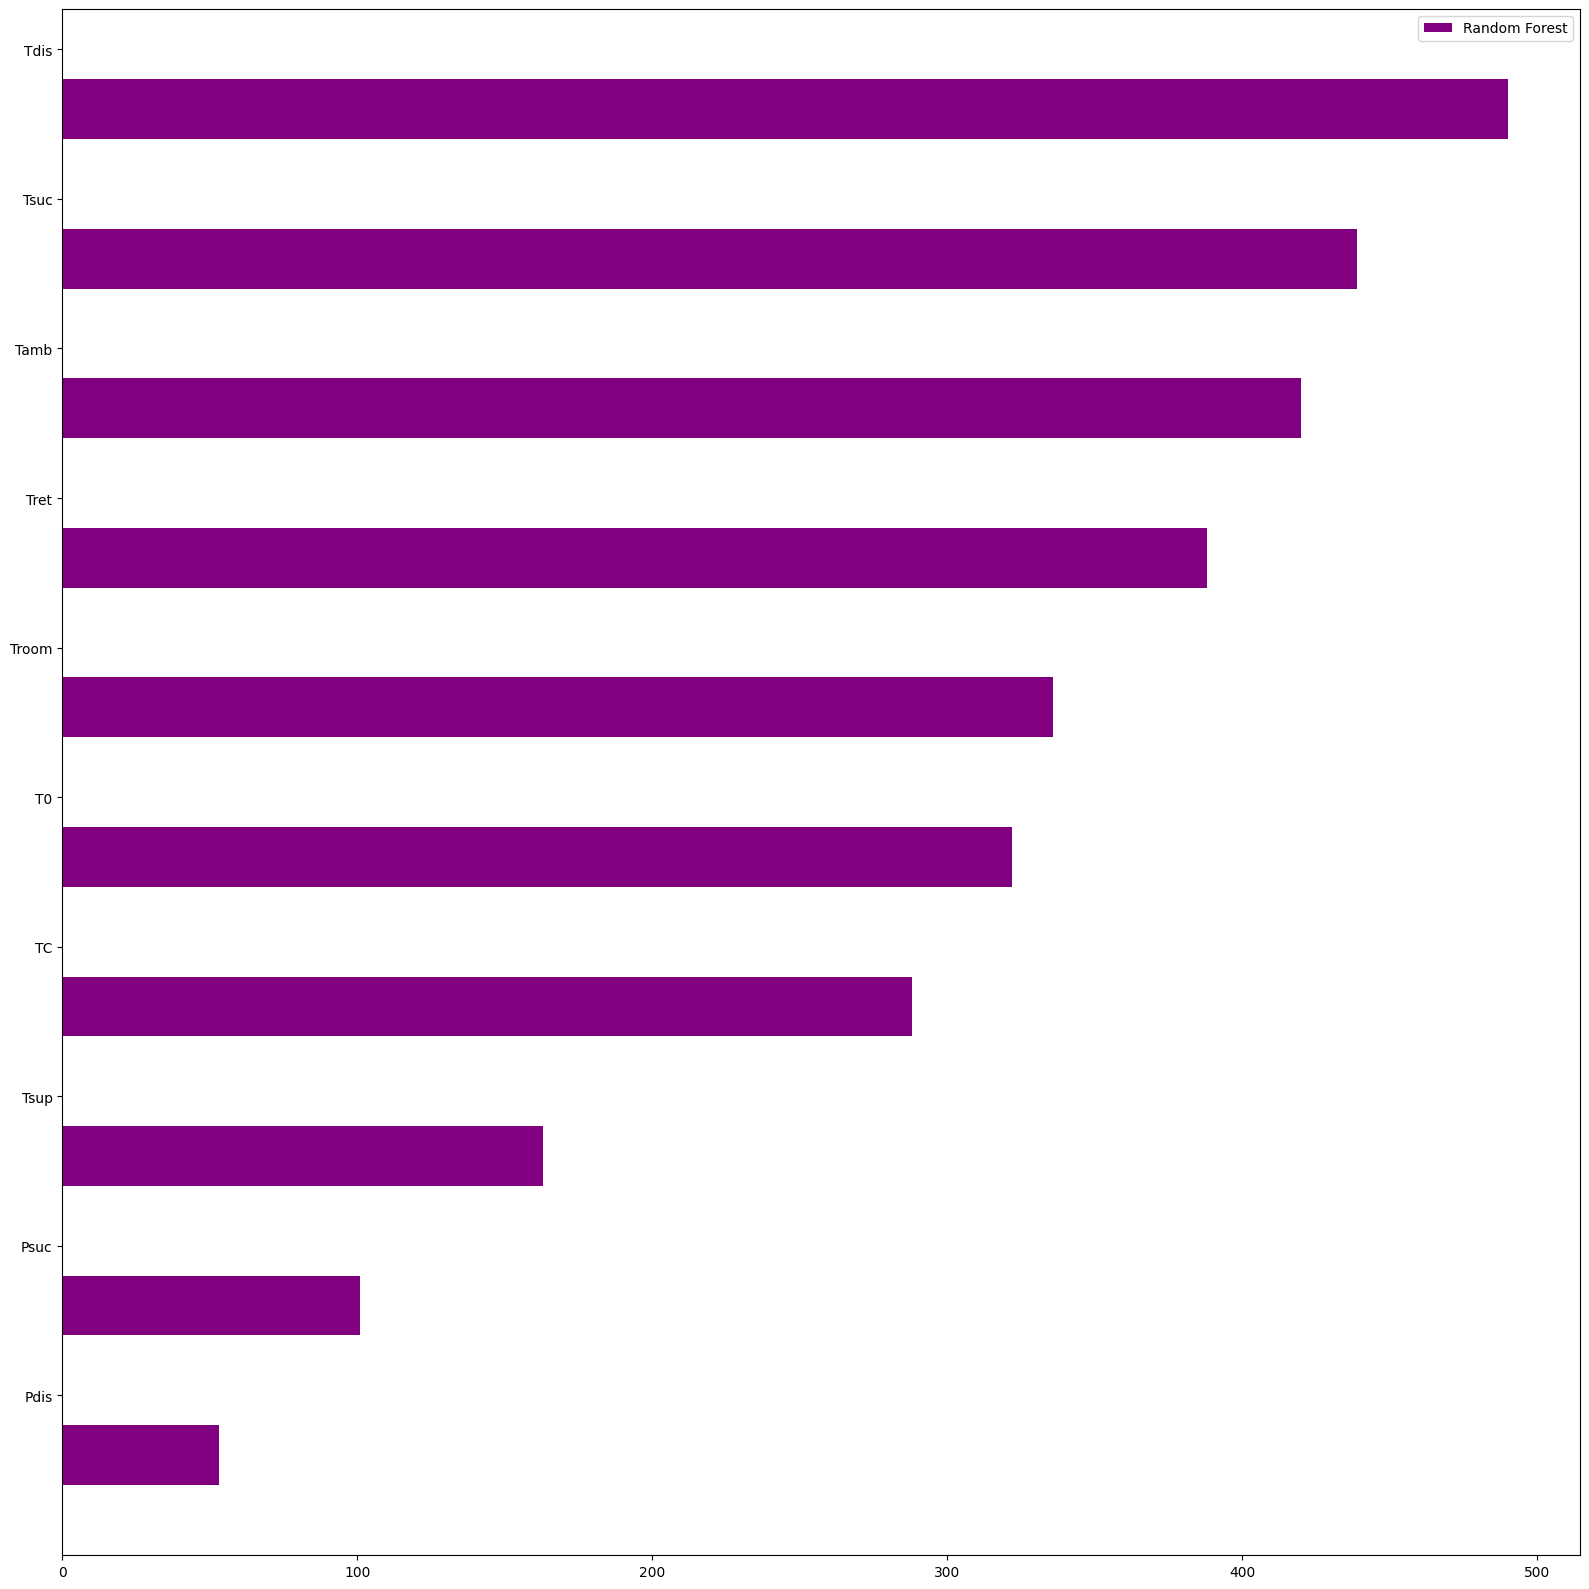

In [73]:
print(LGBM_Model.feature_importances_)
print(sum(LGBM_Model.feature_importances_))
feature_importance=pd.DataFrame({'LGBM_Model':LGBM_Model.feature_importances_},index=df.drop(columns=['Y']).columns)
feature_importance.sort_values(by='LGBM_Model',ascending=True,inplace=True)
feature_importance_sorted = feature_importance.sort_values('LGBM_Model',ascending=False)
print(feature_importance_sorted.to_markdown())
feature_importance_sorted.to_csv("Feature_Importance_LGBM_Model.csv")
feature_importance=pd.DataFrame({'LGBM_Model':LGBM_Model.feature_importances_},index=df.drop(columns=['Y']).columns)
feature_importance.sort_values(by='LGBM_Model',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(16,16))
rfc_feature=ax.barh(index,feature_importance['LGBM_Model'],0.4,color='purple',label='Random Forest')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.tight_layout()
plt.show()

## Adding 1 by 1 sensors

In [74]:
Ndf = df
Ndf.head()

,Troom,Tsuc,T0,Tdis,TC,Tamb,Tret,Tsup,Psuc,Pdis,Y
0,9.44,6.72,-0.01,58.84,33.51,23.20,10.34,7.7,2.92,8.51,0
1,9.44,6.74,0.07,58.82,33.51,23.20,10.34,7.7,2.93,8.51,0
2,9.46,6.76,0.07,58.80,33.38,23.21,10.34,7.7,2.93,8.48,0
3,9.46,6.76,0.07,58.80,33.51,23.21,10.34,7.7,2.93,8.51,0
4,9.47,6.76,-0.01,58.79,33.51,23.21,10.34,7.7,2.92,8.51,0


In [75]:
Ndf = Ndf.iloc[:,[3,1,5,6,0,2,4,7,8,9,10]]
Ndf.head()

,Tdis,Tsuc,Tamb,Tret,Troom,T0,TC,Tsup,Psuc,Pdis,Y
0,58.84,6.72,23.20,10.34,9.44,-0.01,33.51,7.7,2.92,8.51,0
1,58.82,6.74,23.20,10.34,9.44,0.07,33.51,7.7,2.93,8.51,0
2,58.80,6.76,23.21,10.34,9.46,0.07,33.38,7.7,2.93,8.48,0
3,58.80,6.76,23.21,10.34,9.46,0.07,33.51,7.7,2.93,8.51,0
4,58.79,6.76,23.21,10.34,9.47,-0.01,33.51,7.7,2.92,8.51,0


  0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 26528, number of negative: 28166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001011 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 54694, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485026 -> initscore=-0.059915
[LightGBM] [Info] Start training from score -0.059915
0.8973233874506361
[LightGBM] [Info] Number of positive: 26528, number of negative: 28166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 54694, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485026 -> initscore=-0.059915
[LightGBM] [Info] Start training from score -0.0599

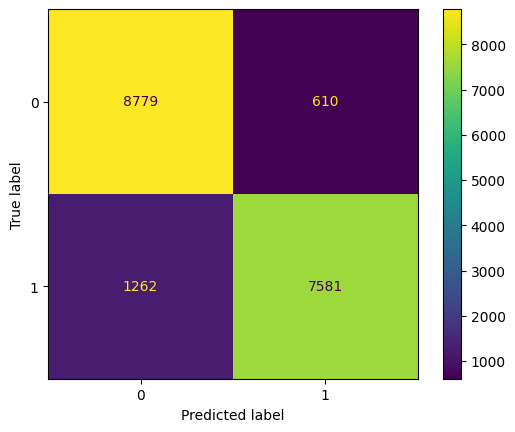

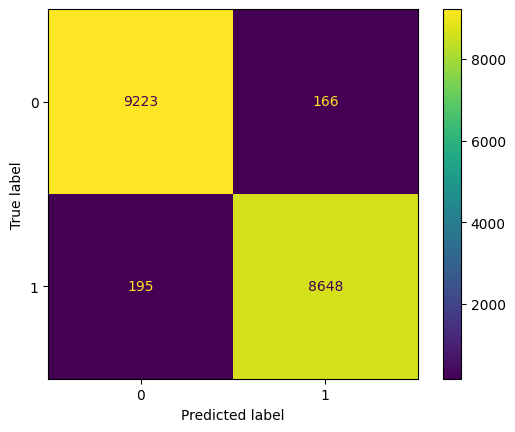

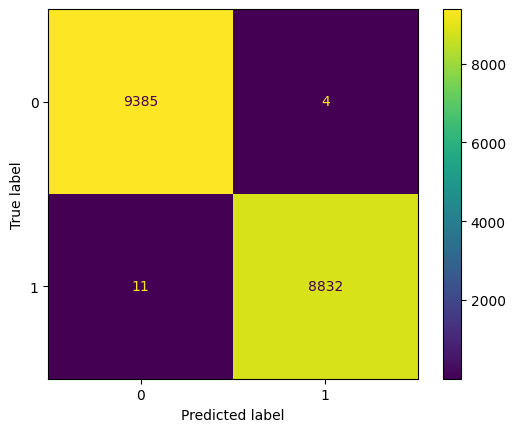

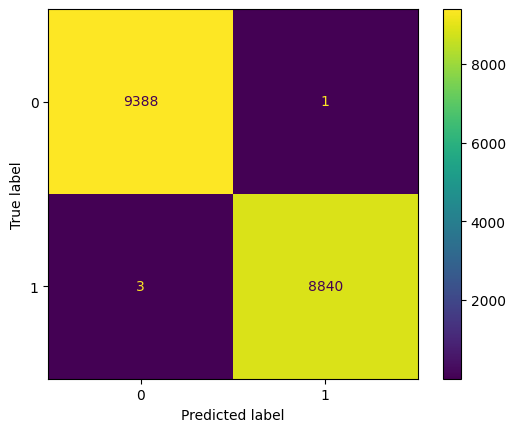

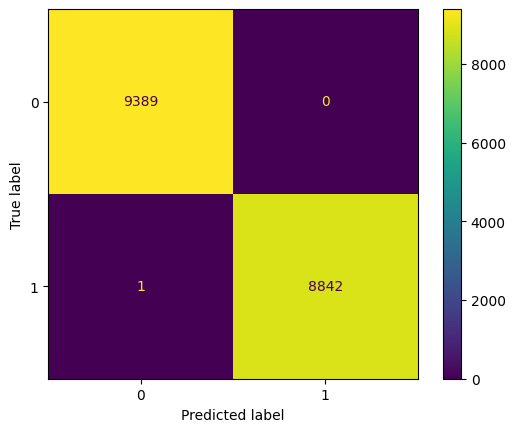

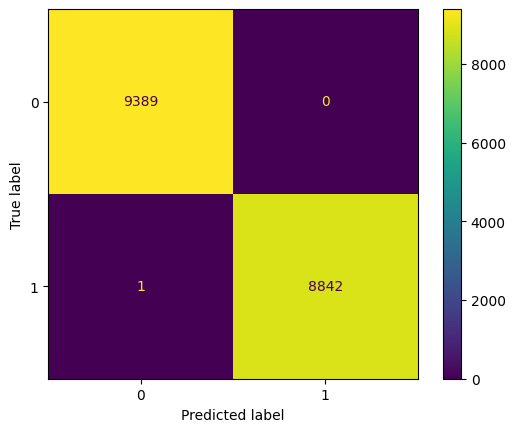

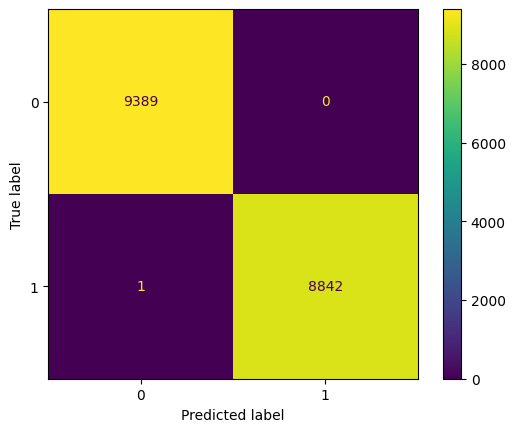

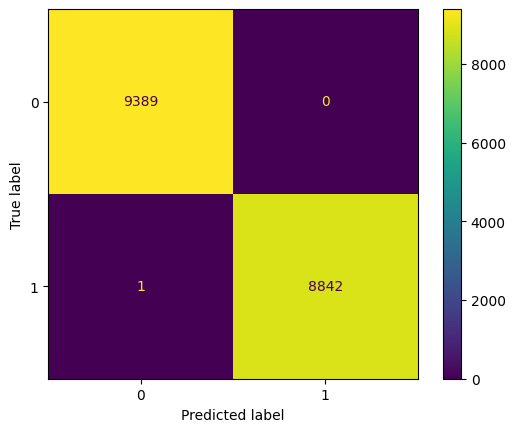

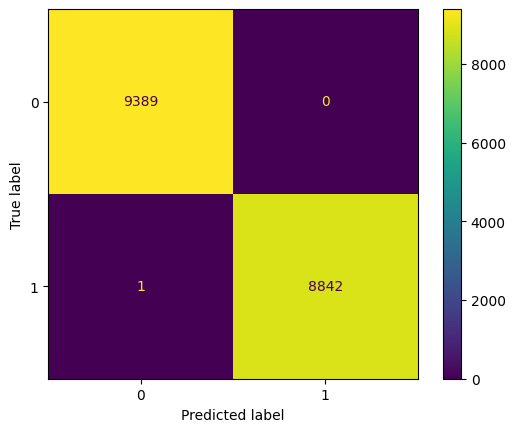

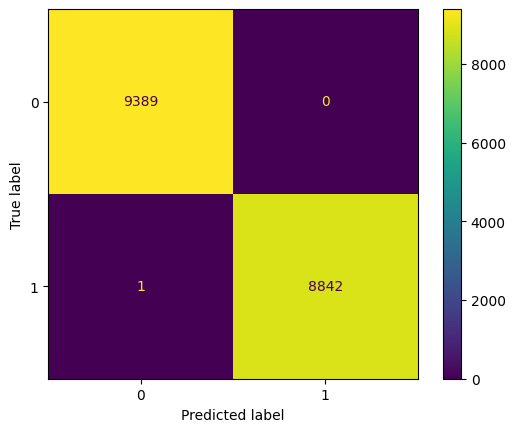

In [76]:
X = Ndf.iloc[:, 0:-1].values
y = Ndf.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 42)

X_train2 = pd.DataFrame(data=X_train)
X_test2 = pd.DataFrame(data=X_test)
y_train2 = pd.DataFrame(data=y_train)
y_test2 = pd.DataFrame(data=y_test)
LGBMlistt = []

for i in tqdm.tqdm_notebook(range(1,11,1)):

  X_test = X_test2.iloc[:, :i].values
  X_train = X_train2.iloc[:, :i].values
  y_train = y_train2.iloc[:, :].values
  y_test =  y_test2.iloc[:, :].values
  LGBM_Model = lgb.LGBMClassifier()
  LGBM_Model.fit(X_train, y_train)
  y_pred = LGBM_Model.predict(X_test)
  cm = confusion_matrix(y_test,y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  scores = f1_score(y_test, y_pred, average='micro')
  LGBMlistt.append(mean(scores))
  print(scores)
print(LGBMlistt)

# Results

In [83]:
Number = [1,2,3,4,5,6,7,8,9,10]
Random_Forest = RFlistt
XGBoost = XGBlistt
CATBoost = CATlistt
LGBM = LGBMlistt
dict = {'Number of sensors': Number, 'Random_Forest': Random_Forest, 'XGBoost': XGBoost, 'CATBoost': CATBoost, 'LGBM': LGBM}
NFDD = pd.DataFrame(dict)
fig = px.line(NFDD, x="Number of sensors", y=NFDD.columns[1:], title='FDD Model with Adding 1 by 1 Feature with and without noise injection', markers = True).update_layout(
    xaxis_title="Number of sensors", yaxis_title="F1_Score")

fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="red"
)
fig.show()

In [84]:
NFDD.to_csv("Algorithms.csv")

In [85]:
Number = [1,2,3,4,5,6,7,8,9,10]
Random_Forest = RFlistt
SNR_ZERO = RFzero
SNR_THREE = RFTHREE
SNR_TEN = RFTEN

dict = {'Number of sensors': Number, 'Random_Forest': Random_Forest, 'SNR_ZERO': SNR_ZERO, 'SNR_THREE': SNR_THREE, 'SNR_TEN': SNR_TEN}
MFDD = pd.DataFrame(dict)
fig = px.line(MFDD, x="Number of sensors", y=MFDD.columns[1:], title='RF', markers = True).update_layout(
    xaxis_title="Number of sensors", yaxis_title="F1_Score")

fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="red"
)
fig.show()

In [86]:
MFDD.to_csv("RF.csv")

In [88]:
Number = [1,2,3,4,5,6,7,8,9,10]
XGBOOST = XGBlistt
SNR_ZERO = XGBzero
SNR_THREE = XGBTHREE
SNR_TEN = XGBTen

dict = {'Number of sensors': Number, 'XGBOOST': XGBOOST, 'SNR_ZERO': SNR_ZERO, 'SNR_THREE': SNR_THREE, 'SNR_TEN': SNR_TEN}
KFDD = pd.DataFrame(dict)
fig = px.line(KFDD, x="Number of sensors", y=KFDD.columns[1:], title='XGBoost', markers = True).update_layout(
    xaxis_title="Number of sensors", yaxis_title="F1_Score")

fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="red"
)
fig.show()

In [89]:
KFDD.to_csv("XGBoost.csv")

In [90]:
Number = [1,2,3,4,5,6,7,8,9,10]
CATBoostt = CATlistt
SNR_ZERO = CATzero
SNR_THREE = CATTHREE
SNR_TEN = CATTEN
dict = {'Number of sensors': Number, 'CATBoostt': CATBoostt, 'SNR_ZERO': SNR_ZERO, 'SNR_THREE': SNR_THREE, 'SNR_TEN': SNR_TEN}
CFDD = pd.DataFrame(dict)
fig = px.line(CFDD, x="Number of sensors", y=CFDD.columns[1:], title='FDD Model with Adding 1 by 1 Feature with noise injection', markers = True).update_layout(
    xaxis_title="Number of sensors", yaxis_title="F1_Score")

fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="red"
)
fig.show()

In [91]:
CFDD.to_csv("CATBoost.csv")

In [92]:
Number = [1,2,3,4,5,6,7,8,9,10]
LGBM = LGBMlistt
SNR_ZERO = LGBMzero
SNR_THREE = LGBMTHREE
SNR_TEN = LGBMTEN
dict = {'Number of sensors': Number, 'LGBM': LGBM, 'SNR_ZERO': SNR_ZERO, 'SNR_THREE': SNR_THREE, 'SNR_TEN': SNR_TEN}
LFDD = pd.DataFrame(dict)
fig = px.line(LFDD, x="Number of sensors", y=LFDD.columns[1:], title='FDD Model with Adding 1 by 1 Feature with noise injection', markers = True).update_layout(
    xaxis_title="Number of sensors", yaxis_title="F1_Score")

fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="red"
)
fig.show()

In [93]:
LFDD.to_csv("LGBM.csv")

In [96]:
Number = [1,2,3,4,5,6,7,8,9,10]
RFzero  = RFzero
XGBzero = XGBzero
CATzero = CATzero
LGBMzero = LGBMzero
dict = {'Number of sensors': Number, 'RFzero ': RFzero , 'XGBzero': XGBzero, 'CATzero': CATzero, 'LGBMzero': LGBMzero}
UFDD = pd.DataFrame(dict)
fig = px.line(UFDD, x="Number of sensors", y=UFDD.columns[1:], title='FDD Model with Adding 1 by 1 Feature with noise injection', markers = True).update_layout(
    xaxis_title="Number of sensors", yaxis_title="F1_Score")

fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="red"
)
fig.show()

In [97]:
Number = [1,2,3,4,5,6,7,8,9,10]
RFTHREE  = RFTHREE
XGBTHREE = XGBTHREE
CATTHREE = CATTHREE
LGBMTHREE = LGBMTHREE
dict = {'Number of sensors': Number, 'RFTHREE ': RFTHREE , 'XGBTHREE': XGBTHREE, 'CATTHREE': CATTHREE, 'LGBMTHREE': LGBMTHREE}
UFDD = pd.DataFrame(dict)
fig = px.line(UFDD, x="Number of sensors", y=UFDD.columns[1:], title='FDD Model with Adding 1 by 1 Feature with noise injection', markers = True).update_layout(
    xaxis_title="Number of sensors", yaxis_title="F1_Score")

fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="red"
)
fig.show()

In [98]:
Number = [1,2,3,4,5,6,7,8,9,10]
RFTEN  = RFTEN
XGBTen = XGBTen
CATTEN = CATTEN
LGBMTEN = LGBMTEN
dict = {'Number of sensors': Number, 'RFTEN ': RFTEN , 'XGBTen': XGBTen, 'CATTEN': CATTEN, 'LGBMTEN': LGBMTEN}
UFDD = pd.DataFrame(dict)
fig = px.line(UFDD, x="Number of sensors", y=UFDD.columns[1:], title='FDD Model with Adding 1 by 1 Feature with noise injection', markers = True).update_layout(
    xaxis_title="Number of sensors", yaxis_title="F1_Score")

fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="red"
)
fig.show()